# Clusterização da base de whisky

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import sys
#!{sys.executable} -m pip install -U scikit-learn

In [21]:
# Carregando odataset do um diretório do notebook
cotacoes = pd.read_csv('cotacoes-dolar-bovespa.csv') # Agora o dataset iris é um Pandas DataFrame

# uma primeir olhada nos dados
cotacoes.head(10)#O método head(n) permite que você veja o começo de um dataframe, o parêtro n define o núemro de linhas serem exibidas

,dia,dolarFechamento,dolarAbertura,dolarMaxima,dolarMinima,dolarVariacaoPercentual,bovespaFechamento,bovespaMinima,bovespaMaxima,bovespaVariacao,bovespaVariacaoPercentual,acao
0,1/7/2019,3.84,3.84,3.85,3.81,-0.30,101339.68,100973.48,102431.61,372.48,0.37,compra
1,2/7/2019,3.85,3.84,3.88,3.82,0.13,100605.17,100072.77,101564.53,-734.51,-0.72,nada
2,3/7/2019,3.83,3.85,3.88,0.38,-0.48,102043.11,100451.36,102176.96,1437.94,1.43,compra
3,4/7/2019,3.80,3.83,3.83,3.78,-0.68,103636.17,102046.55,104021.60,1593.06,1.56,compra
4,5/7/2019,3.82,3.80,3.84,3.80,0.55,104089.47,102621.70,104175.90,453.30,0.44,vende
5,8/7/2019,3.81,0.38,3.82,3.80,-0.39,104530.22,103987.99,104679.30,440.75,0.42,compra
6,10/7/2019,3.75,3.79,3.79,3.75,-1.21,105817.06,104536.70,106650.12,1286.84,1.23,compra
7,11/7/2019,3.76,3.75,3.77,3.73,0.01,105146.44,104813.51,105885.50,-670.62,-0.63,nada
8,12/7/2019,3.74,3.76,3.76,3.73,-0.47,103905.99,103903.06,105730.54,-1240.45,-1.18,compra
9,15/7/2019,3.76,3.74,3.76,3.73,0.52,103802.69,103494.84,104577.91,-103.30,-0.10,nada


In [22]:
# confirmando o número de amostras e de cada ação
print (cotacoes['acao'].count())
print (cotacoes['acao'].value_counts())

211
compra    88
nada      77
vende     46
Name: acao, dtype: int64


In [23]:
# Vamos ver as colunas do dataset
cotacoes.columns.tolist()

['dia',
 'dolarFechamento',
 'dolarAbertura',
 'dolarMaxima',
 'dolarMinima',
 'dolarVariacaoPercentual',
 'bovespaFechamento',
 'bovespaMinima',
 'bovespaMaxima',
 'bovespaVariacao',
 'bovespaVariacaoPercentual',
 'acao']

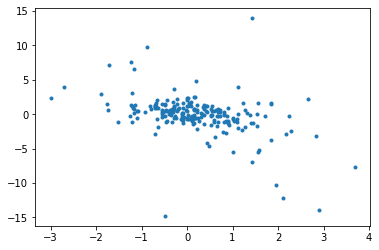

In [24]:

# criando um scatter plot de atributos com o Matplotib 
plt.plot(cotacoes['dolarVariacaoPercentual'],cotacoes["bovespaVariacaoPercentual"],marker='.',linestyle='none')
plt.show()

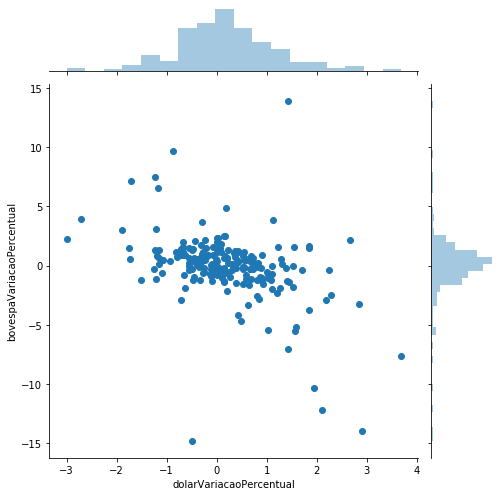

In [25]:
sns.jointplot(x="dolarVariacaoPercentual", y="bovespaVariacaoPercentual", data=cotacoes, size=7)

In [26]:
# cotacoes.info()# Calculando correlação entre as variáveis do dataset
cotacoes.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,dolarFechamento,dolarAbertura,dolarMaxima,dolarMinima,dolarVariacaoPercentual,bovespaFechamento,bovespaMinima,bovespaMaxima,bovespaVariacao,bovespaVariacaoPercentual
dolarFechamento,1.0,0.15,0.086,0.069,0.18,-0.22,-0.21,-0.21,-0.085,-0.063
dolarAbertura,0.15,1.0,0.0053,0.17,0.077,-0.16,-0.16,-0.15,-0.14,-0.14
dolarMaxima,0.086,0.0053,1.0,0.046,-0.016,-0.099,-0.1,-0.083,-0.058,-0.039
dolarMinima,0.069,0.17,0.046,1.0,0.1,-0.13,-0.15,-0.12,0.035,0.054
dolarVariacaoPercentual,0.18,0.077,-0.016,0.1,1.0,-0.15,-0.13,-0.1,-0.44,-0.42
bovespaFechamento,-0.22,-0.16,-0.099,-0.13,-0.15,1.0,1.0,0.99,0.13,0.1
bovespaMinima,-0.21,-0.16,-0.1,-0.15,-0.13,1.0,1.0,0.99,0.085,0.059
bovespaMaxima,-0.21,-0.15,-0.083,-0.12,-0.1,0.99,0.99,1.0,0.018,-0.00026
bovespaVariacao,-0.085,-0.14,-0.058,0.035,-0.44,0.13,0.085,0.018,1.0,0.99
bovespaVariacaoPercentual,-0.063,-0.14,-0.039,0.054,-0.42,0.1,0.059,-0.00026,0.99,1.0


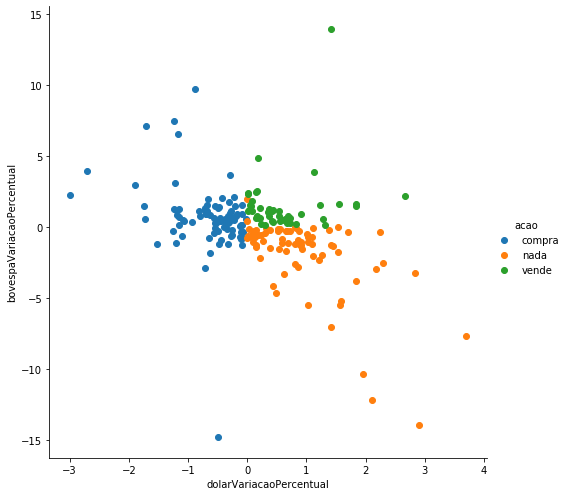

In [27]:
# usando FacetGrid do Seaborn para criar uma scatterplot colorida conforme o atributo species
sns.FacetGrid(cotacoes, hue="acao", size=7) \
   .map(plt.scatter, "dolarVariacaoPercentual", "bovespaVariacaoPercentual") \
   .add_legend()

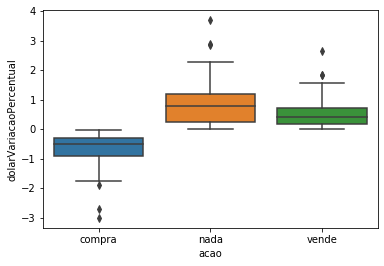

In [28]:

# Um boxplot de atributos  com o seaborn é bem útil para comparar atributos em grupos de interesse
sns.boxplot(x="acao", y="dolarVariacaoPercentual", data=cotacoes);